In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.close('all')

In [2]:
#...some ideas....
#Rather than download a Dataset, I downloaded 5 different series of financial index over the last 10 years up to May '20.
#My idea was to build the dataframe by doing a merge of the different financial index series.
#You will also find a DF with data related to coronavirus, but I will show you later for which aim I will use it.
#Please note I am using the data as I have downloaded from the sites, without any excel manipulation. 
#I have just changed file names.

EurStx = pd.read_csv("C:\\Users\\39333\\Desktop\\Eurostoxx_50.csv", dayfirst = True )
SP =  pd.read_csv("C:\\Users\\39333\\Desktop\\SP500.csv", dayfirst = True)
HongKong =  pd.read_csv("C:\\Users\\39333\\Desktop\\HANGSENG.csv",dayfirst = True)
Nikkei =  pd.read_csv("C:\\Users\\39333\\Desktop\\Nikkei.csv", dayfirst = True)
FTSE100 =  pd.read_csv("C:\\Users\\39333\\Desktop\\FTSE100.csv", dayfirst = True)
CV19 =  pd.read_csv("C:\\Users\\39333\Desktop\\owid-covid-data.csv", dayfirst = True)

In [3]:
#Just having a quick look how the Eurostoxx 50 dataframe looks. The Eurostoxx50 Index is the one for The European Stock Market.

EurStx.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,04-Jan-10,2974.86,3017.80,3017.80,2974.86,0
1,05-Jan-10,3016.64,3012.36,3025.60,3006.47,0
2,06-Jan-10,3010.89,3009.66,3016.83,2997.05,0
3,07-Jan-10,3000.14,3007.34,3013.90,2979.80,0
4,08-Jan-10,3012.97,3017.85,3024.58,2993.73,0


In [4]:
#from this database I only need two pieces of information: 
# 1) the date that I will use as index; 
# 2) the close price because I will do an analisys on price variation within this index also for the others.

EurStx = EurStx.loc[:, ["Date", "Close Price"]]

In [5]:
#Below there is a bit of cleaning of the data. I take only the columns I need in the way I need.
#I clean and Rename the price series using the information I need and set the date as index.

EurStx = EurStx.rename(columns = {"Close Price" : "Eurostoxx50"})
EurStx['Date'] = pd.to_datetime(EurStx['Date'])
EurStx = EurStx.set_index('Date')
EurStx.count()

Eurostoxx50    2638
dtype: int64

In [6]:
EurStx.describe()

,Eurostoxx50
count,2638.000000
mean,3057.553855
std,412.250841
min,1995.010000
25%,2768.472500
50%,3059.850000
75%,3418.075000
max,3865.180000


In [7]:
#For the next indexes I basically do the same. S&P500 relates to the US stock market.
#the series of SP500 looks pretty clean, with the exception being that I need to change the name and the datatype.
#the column SP500 relates to the close price if the index.

SP = SP.rename(columns = {"DATE" : "Date"})
SP = SP.loc[:, ["Date", "SP500"]]
SP.head()

,Date,SP500
0,2010-05-10,1159.73
1,2010-05-11,1155.79
2,2010-05-12,1171.67
3,2010-05-13,1157.44
4,2010-05-14,1135.68


In [8]:
#In the series there were some values = "." (I don't know why, probably because there was a bank holiday and the market was closed)
#those values did not permit me to change the format in floats.
#In order to proceed with converting in floats, I need to replace those values with an empty value in advance.
#with the below lines of code, I change the values giving an empty value and then I can convert the data type.

SP.loc[SP.SP500 == ".", "SP500"] = ""
SP['SP500']= pd.to_numeric(SP['SP500'])
SP['Date'] = pd.to_datetime(SP['Date'])
SP.dtypes

Date     datetime64[ns]
SP500           float64
dtype: object

In [9]:
#As I did before for Eurostoxx50 I set the date as index to then merge the data according to the dates 
SP = SP.set_index('Date')
SP.head()
SP.count()

SP500    2518
dtype: int64

In [10]:
#Same process for the Hang Seng, the index for the Honk Kong Stock Market that gives a view on the chinese market.
#As I did for the previous index below, I repeated the cleaning and harmonization of data.
#I need to insert a format for the date, because pandas appears to import messy dates.

HongKong = HongKong.loc[:, ["Date", "Close"]]
#HongKong.dtypes
HongKong = HongKong.rename(columns = {"Close" : "HKD"}).round(2)
HongKong['Date'] = pd.to_datetime(HongKong['Date'], format = '%d/%m/%Y')
HongKong = HongKong.set_index('Date')
#HongKong.tail()
#HongKong.count()
HongKong.head()

,HKD
Date,
2010-01-04,21823.28
2010-01-05,22279.58
2010-01-06,22416.67
2010-01-07,22269.45
2010-01-08,22296.75


In [11]:
#Same process for the Nikkei225 Index, that is the index for Japanese Stock Market.
#As I did for the previous index below, I repeated the cleaning and harmonization of data.

Nikkei = Nikkei.loc[:, ["Date", "Close"]]
Nikkei = Nikkei.rename(columns = {"Close" : "Nikkei"}).round(2)
Nikkei['Date'] = pd.to_datetime(Nikkei['Date'])
Nikkei = Nikkei.set_index('Date')
#Nikkei.dtypes
#Nikkei.count()
Nikkei.head()

,Nikkei
Date,
2010-01-04,10654.79
2010-01-05,10681.83
2010-01-06,10731.45
2010-01-07,10681.66
2010-01-08,10798.32


In [12]:
#Same process for the FTSE100 Index, that is the index for UK Stock Market.

FTSE100 = FTSE100.loc[:, ["Date", "Close Price"]]
FTSE100 = FTSE100.rename(columns = {"Close Price" : "FTSE100"})
FTSE100['Date'] = pd.to_datetime(FTSE100['Date'])
FTSE100 = FTSE100.set_index('Date')
#FTSE100.count()
FTSE100.head()

,FTSE100
Date,
2010-01-04,5500.34
2010-01-05,5522.50
2010-01-06,5530.04
2010-01-07,5526.72
2010-01-08,5534.24


In [13]:
#Now the data is cleaned and ready for a merge...possibly..
#Below the merge to get the 5 different financial indexes for almost 10 Years.
#You will see a different amount of data for each, because different markets have different closure days.


First_merge = pd.merge(EurStx, SP, on='Date')
Second_merge = pd.merge(First_merge, HongKong, on='Date')
Third_merge = pd.merge(Second_merge, Nikkei, on='Date')
Financial_index = pd.merge(Third_merge, FTSE100, on='Date')
Financial_index.describe()

,Eurostoxx50,SP500,HKD,Nikkei,FTSE100
count,2306.000000,2253.000000,2301.000000,2287.000000,2306.000000
mean,3067.821565,2029.396578,23955.280774,16138.126003,6557.863265
std,416.607354,597.951082,3216.927886,4949.514479,711.418639
min,1995.010000,1022.580000,16250.270000,8160.010000,4823.530000
25%,2769.137500,1430.360000,21704.780000,10435.845000,5929.332500
50%,3084.735000,2039.820000,23312.540000,16758.670000,6654.950000
75%,3428.605000,2549.690000,26389.230000,20440.115000,7188.740000
max,3865.180000,3386.150000,33154.120000,24270.620000,7859.170000


<Figure size 432x288 with 0 Axes>

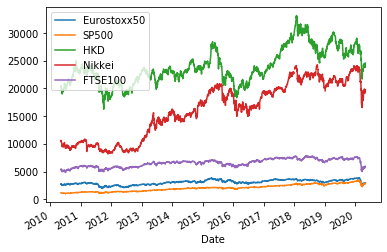

In [14]:
#with the below I plot the data, but the different scale of the values do not give a clear understanding to compare data properly.
#I will pick a shorter interaval for my final purpose (since 30 Dec 19)
#I will also consider the variation after that I set as 100 the first price to have a better looking graph

#below you will find the plot before the manipulation.It does not give a clear view...

plt.figure()
Financial_index.plot()
plt.legend(loc='best')

In [15]:
#with the below code I get the data since the 30/12/2019 that is the last pricing date for 2019.
#Monday 06/01/20 was the first record of the new year

df_YTD = Financial_index.loc['20191230': , ['Eurostoxx50','SP500','HKD','Nikkei','FTSE100']]
df_YTD.head()

,Eurostoxx50,SP500,HKD,Nikkei,FTSE100
Date,,,,,
2019-12-30,3748.47,3221.29,28319.39,23656.62,7587.05
2020-01-06,3752.52,3246.28,28226.19,23204.86,7575.34
2020-01-07,3759.25,3237.18,28322.06,23575.72,7573.85
2020-01-08,3772.56,3253.05,28087.92,23204.76,7574.93
2020-01-09,3795.88,3274.70,28561.00,23739.87,7598.12


In [16]:
#the below is the caluclation with pandas to get the percentage variation from one to the next figure.
#Obviously for the first value there is no % variation. For this reason I put 1 for "na" that is the first value of each index as at 30 dec 2019

df_YTD_variation = (1 + df_YTD.pct_change().round(3))
df_YTD_variation = df_YTD_variation.fillna(1)
df_YTD_variation.head()

,Eurostoxx50,SP500,HKD,Nikkei,FTSE100
Date,,,,,
2019-12-30,1.000,1.000,1.000,1.000,1.000
2020-01-06,1.001,1.008,0.997,0.981,0.998
2020-01-07,1.002,0.997,1.003,1.016,1.000
2020-01-08,1.004,1.005,0.992,0.984,1.000
2020-01-09,1.006,1.007,1.017,1.023,1.003


In [17]:
#As I said before we need the series with a starting point as 100, just to have a clearer view to compare the different variations

df_YTD_variation = (df_YTD_variation.cumprod()*100).round(2)
df_YTD_variation.head()

,Eurostoxx50,SP500,HKD,Nikkei,FTSE100
Date,,,,,
2019-12-30,100.00,100.00,100.00,100.00,100.0
2020-01-06,100.10,100.80,99.70,98.10,99.8
2020-01-07,100.30,100.50,100.00,99.67,99.8
2020-01-08,100.70,101.00,99.20,98.07,99.8
2020-01-09,101.31,101.71,100.89,100.33,100.1


<Figure size 432x288 with 0 Axes>

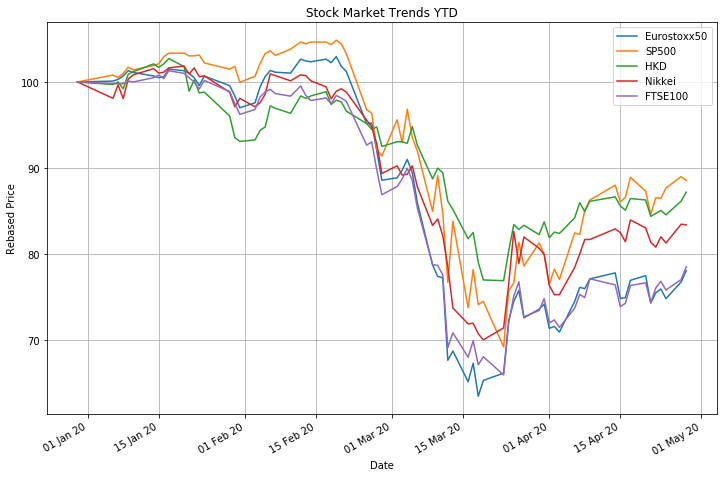

In [18]:
#the below is taking into account the effects of the Covid-19 diffusion on the financial markets.
#below I plot what happened in the markets Year To Date. It seems that there was a big Drop around 30-March?
#What else? Please note the green line; That's the index for China. It seems that it was the first index impacted already in Jan.


plt.figure()
ax = df_YTD_variation.plot(figsize=(12,8),linestyle='-')
plt.legend(loc='best')
plt.grid(True)
ax.set_ylabel('Rebased Price')
ax.set_title('Stock Market Trends YTD')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %y'));

<Figure size 432x288 with 0 Axes>

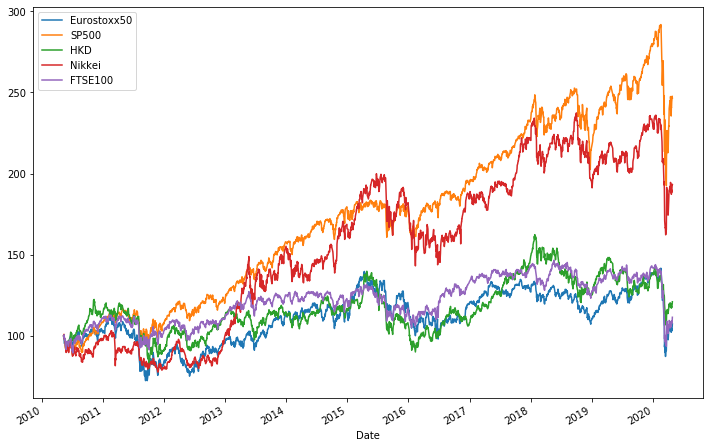

In [19]:
#How about markets after the financial crisis of 2009?
#After 2009 we can note that two indexes performed very well.
#S&P and Nikkei have been the best two indexes after the 2009 crisis.
#The reasons are different and It will take a long time to explain. but briefly:
#the good performance of Nikkei is related to the recovery of Japan after a big drop of stock Market in 1990.
#After reaching a peak of 38,916 Yen points in late 1989, the Japanese stock market began to plunge. Today 2020 the index is around 23,000 Yen.
#Instead the S&P500 reached a level of almost 600$ in 2009, and since then it has grown significantly up to around 3300$.
#It is a different story and too long to tell.

#Other markets in 10 years didn't show such big results.
#Anyway I won't use this value...It was just for curiosity.

Financial_index.head()
Financial_index_variation = (1 + Financial_index.pct_change().round(3))
Financial_index_variation = Financial_index_variation.fillna(1)
Financial_index_variation = (Financial_index_variation.cumprod()*100).round(2)
plt.figure()
Financial_index_variation.plot(figsize=(12,8))
plt.legend(loc='best')

In [20]:
#Let's have a look at the Covid-19 Database up to May 2020...

CV19.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,13/03/2020,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,20/03/2020,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,24/03/2020,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,25/03/2020,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,26/03/2020,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [21]:
CV19.count()

iso_code                    16528
location                    16592
date                        16592
total_cases                 16592
new_cases                   16592
total_deaths                16592
new_deaths                  16592
total_cases_per_million     16285
new_cases_per_million       16285
total_deaths_per_million    16285
new_deaths_per_million      16285
total_tests                  4197
new_tests                    3763
total_tests_per_thousand     4197
new_tests_per_thousand       3772
tests_units                  4197
population                  16365
population_density          15898
median_age                  15161
aged_65_older               14963
aged_70_older               15086
gdp_per_capita              14974
extreme_poverty              9983
cvd_death_rate              15192
diabetes_prevalence         15639
female_smokers              12542
male_smokers                12415
handwashing_facilities       6453
hospital_beds_per_100k      14119
dtype: int64

In [22]:
#below I managed the data and I got 5 columns for my final purpose.

CV19 = CV19.rename(columns = {"date" : "Date"})
CV19['Date'] = pd.to_datetime(CV19['Date'], format = '%d/%m/%Y')
CV19 = CV19.loc[:, ["Date", "location", "total_cases", "new_cases"]]
CV19.set_index('Date', drop = True, append = False, inplace = True, verify_integrity = False)
CV19["location"] = CV19["location"].astype(str)
CV19.head()

,location,total_cases,new_cases
Date,,,
2020-03-13,Aruba,2,2
2020-03-20,Aruba,4,2
2020-03-24,Aruba,12,8
2020-03-25,Aruba,17,5
2020-03-26,Aruba,19,2


In [23]:
#I will consider only the trends of 2 countries that had the early effects of a Covid 19 outbreak:
#China (First Asian and World Country) and Italy (First European Country strongly impacted)

CV19 = CV19[CV19["location"].isin([ 'China', 'Italy'])]
CV19.head()

,location,total_cases,new_cases
Date,,,
2019-12-31,China,27,27
2020-01-01,China,27,0
2020-01-02,China,27,0
2020-01-03,China,44,17
2020-01-04,China,44,0


In [24]:
#with the below I reorganised the data in a pivot table;
#because I'm going to use the total cases and new cases for those 2 countries.

CV19_Total_Cases = pd.pivot_table(CV19, values = ['total_cases'], index = ["Date"], columns = ["location"])
CV19_Total_Cases = CV19_Total_Cases.sort_values(by = 'Date', ascending = True)
CV19_Total_Cases.head()

total_cases      
location         China Italy
Date                        
2019-12-31          27     0
2020-01-01          27     0
2020-01-02          27     0
2020-01-03          44     0
2020-01-04          44     0

In [25]:
#New Cases

CV19_New_Cases = pd.pivot_table(CV19, values = ['new_cases' ], index = ["Date"], columns = ["location"])
CV19_New_Cases = CV19_New_Cases.sort_values(by = 'Date', ascending = True)
CV19_New_Cases.head()

new_cases      
location       China Italy
Date                      
2019-12-31        27     0
2020-01-01         0     0
2020-01-02         0     0
2020-01-03        17     0
2020-01-04         0     0

<Figure size 432x288 with 0 Axes>

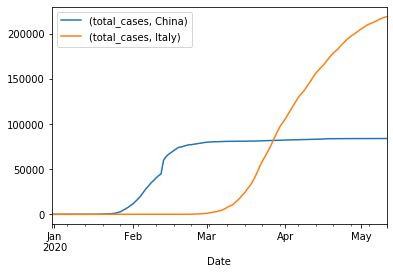

In [26]:
#As we know China was the first impacted, but the virus spread was well managed. Afterwards there was the outbreak in Italy.
#below the comparision of the 2 curves.

plt.figure()
CV19_Total_Cases.plot()
plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

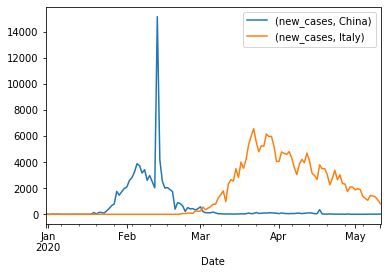

In [27]:
#Below the curves of New cases. 
#The China one was very condensed with a higher peak of new cases.
#The Italy one was more spread out with a Lower peak but for a longer period of time.

plt.figure()
CV19_New_Cases.plot()
plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

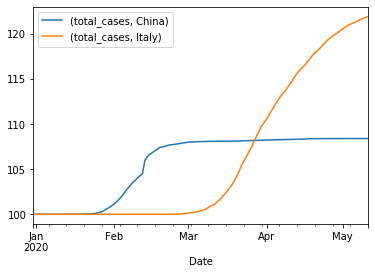

In [28]:
#The below manipulation it is just to change the scale for total cases 
#and to plot the data togheter with the financial indexes (here we are)!
#It will change the scale only the starting point as at 100, but not the trend of the curve.
#I understand that it is not really a nice operation, but I just need  to show the trends in a graph all together.

CV19_Total_Cases =  100 + (CV19_Total_Cases/10000)
plt.figure()
CV19_Total_Cases.plot()
plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

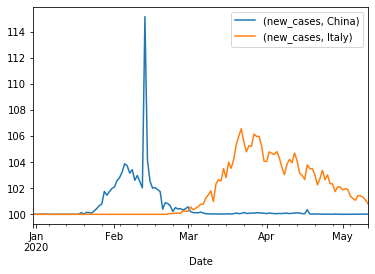

In [29]:
#Same as before. Nothing really changed

CV19_New_Cases =  100 + (CV19_New_Cases/1000)
CV19_New_Cases
plt.figure()
CV19_New_Cases.plot()
plt.legend(loc='best')

In [30]:
#I merge togheter the financial data e the data of corona virus e re-scale to 0

merge = pd.merge(df_YTD_variation, CV19_Total_Cases, on='Date')
Comparison = pd.merge(merge, CV19_New_Cases, on='Date')
Comparison = Comparison - 100 #rescale to 0 for plotting purposes
Comparison.head()

C:\Users\39333\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Eurostoxx50,SP500,HKD,Nikkei,FTSE100,"(total_cases, China)","(total_cases, Italy)","(new_cases, China)","(new_cases, Italy)"
Date,,,,,,,,,
2020-01-06,0.10,0.80,-0.30,-1.90,-0.2,0.0059,0.0,0.0,0.0
2020-01-07,0.30,0.50,0.00,-0.33,-0.2,0.0059,0.0,0.0,0.0
2020-01-08,0.70,1.00,-0.80,-1.93,-0.2,0.0059,0.0,0.0,0.0
2020-01-09,1.31,1.71,0.89,0.33,0.1,0.0059,0.0,0.0,0.0
2020-01-10,1.10,1.40,1.19,0.83,0.0,0.0059,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

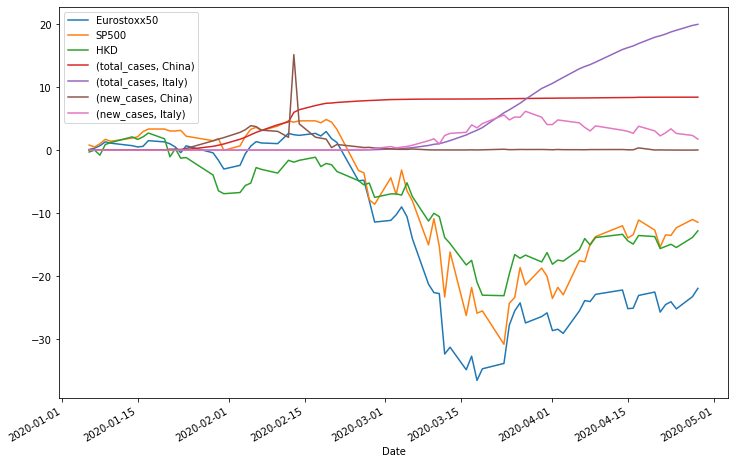

In [31]:
#below I just dropped two indexes to make the graph easier to read.
#What can you notice?
#the first market that really priced the covid-19 is China that was the first country really impacted for a while.
#Indeed you can see that the green line goes down when the number of total and new cases in China went up.
#Yes the other markets dropped marginally, but it wasn't big at all.  
#The emergency was declared on The 22nd of January It as a “public health emergency of international concern".
#Other markets didn't really priced the Covid-19, as they were still optimistic as it was only impacting Asia.
#.....Until one month later on 21 feb 2020, 16 cases were declared in Italy.
#From there and for a while there was a big drop in the western markets and China was the one less impacted.


Comparison = Comparison.drop(["Nikkei","FTSE100"], axis = 1)
plt.figure()
Comparison.plot(figsize=(12,8))
plt.legend(loc='best')